*Copyright (c) Tumiz. Distributed under the terms of the GPL-3.0 License.*

# Introduction

Here is brief indroduction of Scenario. You will learn how to create a scenario and control objects in it.

Create a empty scenario and render it

In [1]:
from scenario import *
scen=Scenario()
scen.render()

**Add a object** to scenario

In [3]:
cube=Cube()
scen.add(cube)
scen.render()

Change its **color** to red

In [4]:
cube.color=Color(r=1)
scen.render()

Set its **position**

In [5]:
cube.position=Vector3(1,0,2)
scen.render()

**Rotate** it around z axis

In [6]:
cube.rotation.rotate_z(0.3)
scen.render()

Rotate it around its own y axis

In [7]:
cube.rotation=cube.rotation*Rotation.Eular(0,0.3,0)
scen.render()

**Add** a axis to cube

In [8]:
cube.add(XYZ())
scen.render()

Continue to **rotate it around its own y axis** with a speed 0.3rad/s

In [9]:
import time
cube.local_angular_velocity=Rotation.Eular(0,0.3,0)
scen.t=0
while scen.t<10:
    scen.step(0.1)
    scen.render()
    time.sleep(0.1)

**Remove** it

In [9]:
scen.remove(cube)
scen.render()

# Basic Shapes

Here you will learn how to create basic shapes like sphere, line, cylinder. 

## Sphere
Create a blue sphere and add it to the scenario

In [4]:
from scenario import *
scen=Scenario()
sphere=Sphere()
sphere.color=Color(b=1)
scen.add(sphere)
scen.render()

Change its **radius**

In [11]:
sphere.radius=2
scen.render()

## Line
Create a pink line with two points (0,1,3)(3,0,3) and add it to the scenario

In [5]:
from scenario import *
scen=Scenario()
line=Line()
line.color=Color(r=1,b=1)
line.add_point(Vector3(0,1,3),Vector3(3,0,3))
scen.add(line)
scen.render()

Set **width** to 3

In [14]:
line.width=3
scen.render()

If you want it to be an **arrow**

In [15]:
line.type=Line.Type_Vector
scen.render()

A more complex example: use Line to draw a love heart

In [6]:
from scenario import *
scen=Scenario()

line=Line()
line.color=Color(r=1)
line.width=2
line.add_point(Vector3(0,0,0))
line.add_point(Vector3(0,-1,1))

r=sqrt(2)/2
for i in range(20):
    a=pi*5/4-i*pi/20
    line.add_point(Vector3(0,-0.5+r*cos(a),1.5+r*sin(a)))
line.add_point(Vector3(0,0,2))
for i in range(20):
    a=pi*3/4-i*pi/20
    line.add_point(Vector3(0,0.5+r*cos(a),1.5+r*sin(a)))
line.add_point(Vector3(0,1,1))
line.add_point(Vector3(0,0,0))
scen.add(line)
scen.render()

Another example: update points **dynamically**

In [7]:
from scenario import *
from time import sleep
from math import sin,cos
scen=Scenario()
l=Line()
l.line_width=2
l.color=Color(r=1,b=1)
l.width=2
scen.add(l)
while scen.t<10:
    x=sin(5*scen.t)*scen.t
    y=cos(5*scen.t)*scen.t
    z=scen.t
    l.add_point(Vector3(x,y,z))
    scen.step(0.01)
    scen.render()
    sleep(0.01)

## Cylinder

Set **top_radius, bottom_radius** and **height** to define a cylinder

In [8]:
from scenario import *
scen=Scenario()
c=Cylinder()
c.top_radius=1
c.bottom_radius=2
c.height=1
c.color=Color(r=1)
scen.add(c)
scen.render()

Set its center **axis**

In [11]:
c.set_axis(Vector3(1,1,1))
scen.render()

## Cube

Cube use 3d scale to represent its with, height and length

In [9]:
from scenario import *
scen=Scenario()
c=Cube()
c.scale=Vector3(1,2,3)
scen.add(c)
scen.render()

## Pipe

Creates extruded geometry from a path shape

In [10]:
from scenario import *
scen=Scenario()
p=Pipe()
p.cross=[[0.1,4],[-0.1,4],[-0.1,-4],[0.1,-4],[0.1,4]]
p.path=[[-15, 2, 0],[-5, 2, 0.3],[0, 0, 1],[5, -2,1],[15, -5, 1]]
scen.add(p)
scen.render()

In [14]:
from scenario import *
scen=Scenario()
cross=[]
cross.append([0,0])
cross.append([-1,1])

r=sqrt(2)/2
for i in range(21):
    a=pi*5/4-i*pi/20
    cross.append([-0.5+r*cos(a),1.5+r*sin(a)])
cross.append([0,0,2])
for i in range(20):
    a=pi*3/4-i*pi/20
    cross.append([0.5+r*cos(a),1.5+r*sin(a)])
cross.append([1,1])
cross.append([0,0])
p=Pipe()
p.cross=cross
p.path=[[0, 0, 0],[5, 5, 5]]
p.color=Color(r=1)
scen.add(p)
scen.render()

# Motion

Here you will learn how to move a object.

## Translation

If you want to move a object, it's very easy, just modify its position. Here is an example showing how to move a cube along x axis.

In [15]:
from scenario import *
from time import sleep
scen=Scenario()
c=Cube()
c.color=Color(b=1)
c.scale=Vector3(1,2,3)
scen.add(c)
for i in range(100):
    c.position[0]+=0.1
    sleep(0.1)
    scen.render()

Then, move it along y axis

In [16]:
for i in range(100):
    c.position[1]+=0.1
    sleep(0.1)
    scen.render()

Move it back to origin point

In [17]:
for i in range(100):
    c.position[1]-=0.1
    c.position[0]-=0.1
    sleep(0.1)
    scen.render()

Use **velocity** to move the cube, velocity's unit is m/s

In [19]:
c.velocity=Vector3(0.4,0.2,0.4)
scen.t=0
while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

Use **local velocity** to move it, local velocity's unit is also m/s

In [23]:
c.position=Vector3()
c.rotation=Rotation.Eular(0.3,-0.5,0.2)
c.velocity=Vector3()
c.local_velocity=Vector3(0.2,0,0)
scen.t=0
while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

## Rotation

If you want to ratate a object, there are many ways to achieve it. Here is an example showing how to rotate a cube in different ways.\
Codes below shows how to rotate a cube **around z axis**.

In [24]:
from scenario import *
from time import sleep
scen=Scenario()
c=Cube()
c.color=Color(b=1)
c.scale=Vector3(1,2,3)
scen.add(c)
for i in range(100):
    c.rotation.rotate_z(0.1)
    sleep(0.1)
    scen.render()

**Reset** its rotation.

In [10]:
c.rotation=Rotation()
scen.render()

Rotate it **around axis** (1,0,0)

In [11]:
axis=Vector3(1,0,0)
for i in range(100):
    c.rotation.rotate_axis(axis,0.1)
    sleep(0.1)
    scen.render()

Rotate a cylinder like a wheel

In [11]:
from scenario import *
from time import sleep
scen=Scenario()
c=Cylinder()
c.color=Color(r=1)
c.top_radius=2
c.bottom_radius=2
c.height=0.5
axis=Vector3(1,1,1)
c.set_axis(axis)
c.add(XYZ())
scen.add(c)
for i in range(100):
    c.rotation.rotate_axis(axis,0.02)
    sleep(0.1)
    scen.render()

Use **angular velocity** to rotate the cylinder, it will rotate around y axis of world frame.

In [31]:
from scenario import *
from time import sleep
scen=Scenario()
c=Cylinder()
c.color=Color(r=1)
c.top_radius=2
c.bottom_radius=2
c.height=0.5
axis=Vector3(1,1,1)
c.set_axis(axis)
c.angular_velocity=Rotation.Eular(0,1,0)
c.add(XYZ())
scen.add(c)
scen.render()
while scen.t<10:
    scen.step(0.2)
    sleep(0.1)
    scen.render()

Use **local angular velocity** to rotate the cylinder, it will rotate on its own y axis

In [33]:
from scenario import *
from time import sleep
scen=Scenario()
c=Cylinder()
c.color=Color(r=1)
c.top_radius=2
c.bottom_radius=2
c.height=0.5
axis=Vector3(1,1,1)
c.set_axis(axis)
c.local_angular_velocity=Rotation.Eular(0,1,0)
c.add(XYZ())
scen.add(c)
scen.render()

while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

A more complex example: move a cube with both **local velocity** and **local angular velocity**

In [4]:
from scenario import *
from time import sleep
scen=Scenario()
c=Cube()
c.color=Color(b=1)
c.local_velocity=Vector3(1,0,0)
c.local_angular_velocity=Rotation.Eular(0,0,0.6)
scen.add(c)
while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

# Add child object to a object

Add a cube as a child to an existing cube.

In [21]:
from scenario import *
from time import sleep
scen=Scenario()
parent=XYZ()
parent.scale=Vector3(2,3,5)
parent.position=Vector3(1,1,1)
parent.rotation=Rotation.Eular(0.2,0.1,0.5)
scen.add(parent)
child=Cube()
child.scale=Vector3(1,1,0.3)
child.position=Vector3(0.5,0.5,0.5)
child.rotation=Rotation.Eular(0,0.5,0)
child.add(Line.Vector(Vector3(0,0,1)))
parent.add(child)
scen.render_in_jupyter=False
scen.render()

Rotate child cube in its local space (the child's body frame)

In [22]:
parent.local_angular_velocity=Rotation.Eular(0,0,0.3)
child.local_angular_velocity=Rotation.Eular(0,0,0.6)
scen.t=0
while scen.t<15:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

Rotate child cube in parent's space

In [16]:
child.local_angular_velocity=None
child.angular_velocity=Rotation.Eular(0,0,0.6)
print(child.angular_velocity.to_eular())
scen.t=0
while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

[-0.0, 0.0, 0.6000000089337368]


Translate the cube with world velocity (1,0,0)

In [13]:
child.position=Vector3(0.5,0.5,0.5)
child.velocity=Vector3(0.1,0,0)
child.angular_velocity=Rotation()
scen.t=0
while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

Translate the cube with local velocity (1,0,0)

In [12]:
child.position=Vector3(0.5,0.5,0.5)
child.local_velocity=Vector3(1,0,0)
child.angular_velocity=Rotation()
scen.t=0
while scen.t<10:
    scen.step(0.1)
    sleep(0.1)
    scen.render()

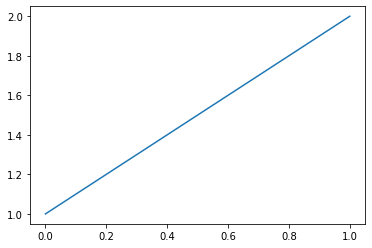

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2])